# Affine transforms
This notebook demonstrates how to apply affine transforms to 3D images.

In [1]:
import pyclesperanto_prototype as cle

cle.select_device('RTX')

<NVIDIA GeForce RTX 3080 on Platform: NVIDIA CUDA (1 refs)>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imshow

# Helper function for reading ImageJs ZIP file examples
import requests
import zipfile
from io import BytesIO
from tifffile import imread

def remote_reader(url):
    """generator that returns the first numpy arrays representing 
    in a tif in a remote zip."""
    response = requests.get(url)
    response.raise_for_status()
    with zipfile.ZipFile(BytesIO(response.content)) as zf:
        for path in zf.filelist:
            with zf.open(path, "r") as f:
                # f is a file-like object of type zipfile.ZipExtFile
                # replace imread with any file-reader of your choice
                # that accepts a file-like object as input 
                return imread(f)

In [3]:
# Laod example data
np_array = remote_reader('https://imagej.nih.gov/ij/images/t1-head.zip')
np_array.shape

(129, 256, 256)

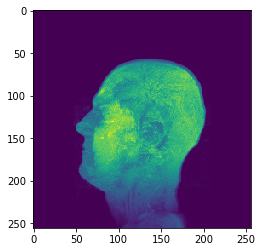

In [4]:
# push it to GPU memory
input_image = cle.push(np_array)

cle.imshow(input_image)

### Shearing
Providing the shear angle will shear the image in the desired plane

The shear is calculated using the shear angle by the following equation:

1.0/ tan(shear_angle_in_degrees * pi / 180)


Zero div error_xz
Angle;  60
Zero div error_xz
Angle;  30
Zero div error_xz
Zero div error_yz
Angle;  0
Zero div error_xz
Angle;  -30
Zero div error_xz
Angle;  -60


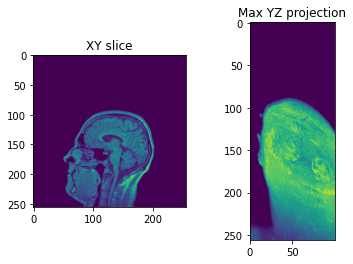

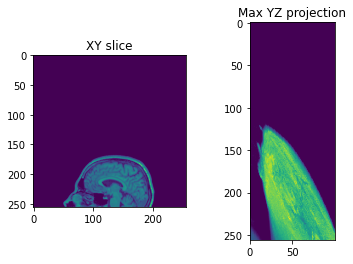

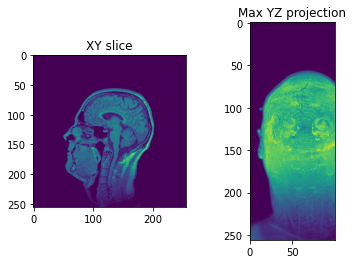

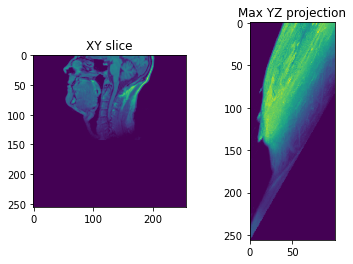

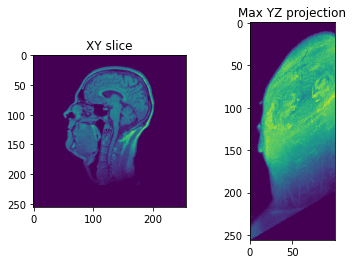

In [5]:
#For example, to shear the image in the Y axis along YZ plane using a shear angle of 30 degrees

for shear_angle in [60, 30, 0, -30, -60]:
    transform = cle.AffineTransform3D()
    shear_transform= transform.shear_in_z_plane(angle_y_in_degrees=shear_angle)

    transformed_image = cle.affine_transform(input_image, transform=shear_transform)
    #cle.imshow(transformed_image[64])
    fig, (ax1,ax2) = plt.subplots(1, 2)
    print("Angle; ",shear_angle)
    ax1.imshow(transformed_image[64])
    ax1.set_title("XY slice")
    ax2.imshow(np.max(transformed_image[:100,:,:],axis=2))
    ax2.set_title("Max YZ projection")

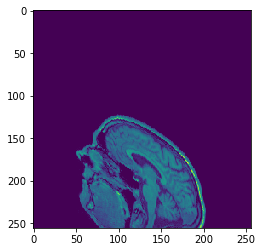

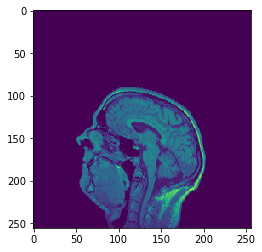

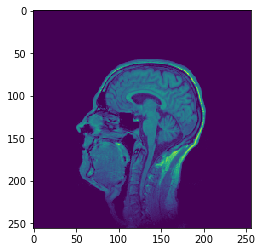

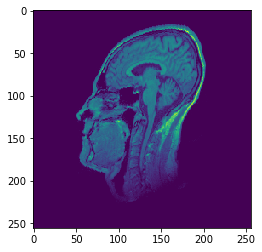

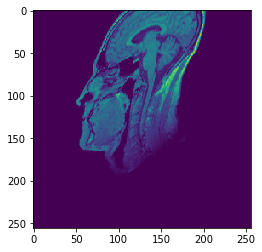

Error2


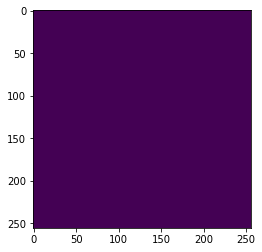

In [6]:
#For example, to shear the image in the Y axis along YZ plane using a shear angle of 30 degrees

for shear_angle in [-30, -15, 0, 15, 30, 90]:
    transform = cle.AffineTransform3D()
    shear_transform= transform.shear_in_z_plane(angle_y_in_degrees=shear_angle)

    transformed_image = cle.affine_transform(input_image, transform=shear_transform)

    cle.imshow(transformed_image[64])